In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC

%matplotlib inline

In [11]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos, 0], X[pos, 1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg, 0], X[neg, 1], s=60, c='y', marker='o', linewidths=1)

In [12]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:,0].min()-pad, X[:,0].max()+pad
    y_min, y_max = X[:,1].min()-pad, X[:,1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plotData(X, y)
    
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='|', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### SVM Dataset 1

In [13]:

data1 = loadmat('ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [14]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


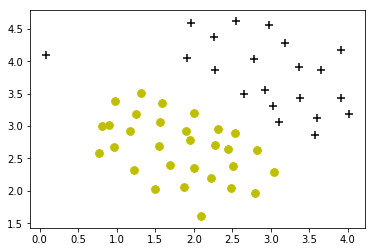

In [15]:
plotData(X1, y1)

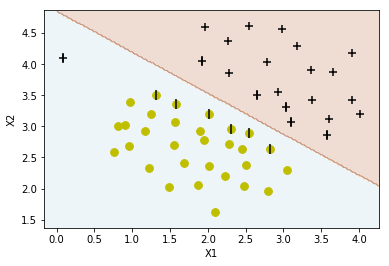

Number of support vectors:  12


In [17]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

In [19]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [20]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

## SVM Dataset 2

In [21]:
data2 = loadmat('ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [22]:
X2 = data2['X']
y2 = data2['y']
print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


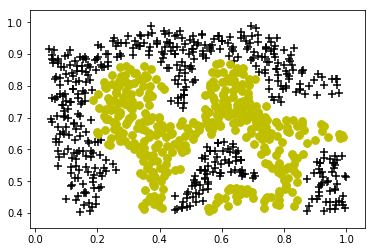

In [23]:
plotData(X2, y2)

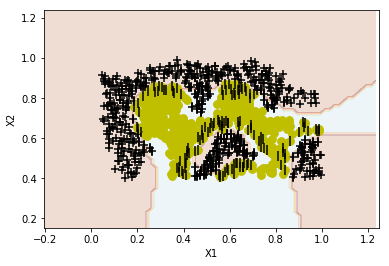

Number of support vectors:  254


In [25]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)